### Unsupervised clustering results

In [6]:
from tqdm import tqdm
i = 0
first=True
base_path = '/home/rohan/Remote-AI/dat/result/TE_NM_cc/gmm_model_select_cv_0/'
for n in tqdm(np.arange(10,45,1)):
    for ri in range(21):
        fname = base_path+f'gmmfit_restricted_perc_100-0_aT_1-0_aE_1-0_cs_1-0_ad_1_cv_0_ri_{ri}_ld_3_ne_1500_fiton_zTminn_{n}_maxn_{n+1}.csv'
        if first:
            df = pd.read_csv(fname)
            df['cv']=ri
            first=False
        else:
            temp = pd.read_csv(fname)
            temp['cv']=ri
            df=df.append(temp,ignore_index=True)
            
#gmmfits_combined_aT_1_0_aE_1_0_cs_1_0_ad_1_ld_3_ne_1500_ft_500_fiton_zT.csv

100%|██████████| 35/35 [00:05<00:00,  5.96it/s]


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1)
sns.set_style('ticks',{'axes.grid' : False})

figure_path = '/home/rohan/Dropbox/AllenInstitute/CellTypes/doc/NCS/'

In [8]:
#D = pd.read_csv('/home/rohan/Remote-AI/dat/result/TE_NM/gmm_model_select/gmmfits_combined_aT_1_0_aE_1_0_cs_1_0_ad_1_ld_3_ne_1500_ft_500_fiton_zT.csv')
#D = pd.read_csv('/home/rohan/Remote-AI/dat/result/TE_NM_cc/gmm_model_select_cv_0/gmmfits_combined_aT_1_0_aE_1_0_cs_1_0_ad_1_ld_3_ne_1500_ft_500_fiton_zT.csv')
D = df
field_name = 'bic_train'
X_mean = D.groupby('n_components').mean()[[field_name]]
X_sd = D.groupby('n_components').std()[[field_name]]
best_n_components = X_mean[field_name].idxmin()

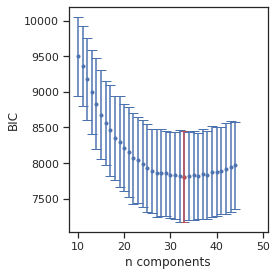

In [9]:
plt.figure(figsize=(4,4))
plt.errorbar(x=X_mean.index.values,
             y=X_mean[field_name].values,
             yerr=X_sd[field_name].values,
             fmt='.',
             capsize=5)

plt.errorbar(x=best_n_components,
             y=X_mean[field_name][best_n_components],
             yerr=X_sd[field_name][best_n_components],
             fmt='.',
             c='r',
             capsize=3)

ax = plt.gca()
ax.set_xlabel('n components')
ax.set_ylabel('BIC')
ax.set_xlim(8,51)
ax.set_xticks(np.arange(10,51,10))
plt.tight_layout()
#plt.savefig(figure_path+'denovo_gmm_bic.png',dpi=300)

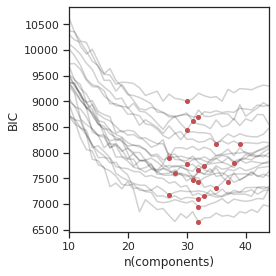

In [10]:
n_component_list=[]
bic_list=[]
plt.figure(figsize=(4,4))
for cv in range(21):
    Dd = D[D['cv']==cv]
    plt.plot(Dd['n_components'],Dd[field_name],'-k',alpha=0.2)
    temp = Dd.loc[Dd[field_name]==Dd[field_name].min()]
    bic_list.append(temp[field_name].values[0])
    n_component_list.append(temp['n_components'].values[0])
    
plt.plot(n_component_list,bic_list,'.r',markersize=8)
    
#plt.plot(X_mean.index.values,X_mean[field_name].values,'.-',c='k',label='mean')


ax = plt.gca()
ax.set_xlabel('n(components)')
ax.set_ylabel('BIC')
#ax.set_ylim(1000,5600)
ax.set_xlim(10,44)
ax.set_xticks(np.arange(10,44,10))
#plt.legend()
plt.tight_layout()
plt.savefig(figure_path+'aT_1_0_aE_1_0_cs_1_0_us_bic_cvsets.pdf')

**Freedman-Diaconis rule** 

bin width $h = 2\times{IQ}\times{n^{−\frac{1}{3}}}$
 - IQ is the interquartile range
 - n is number of observations

In [11]:
from scipy.stats import iqr
FD_binwidth = 2*iqr(n_component_list)*(len(n_component_list))**(-1/3)
print(FD_binwidth)

2.1747607460057843


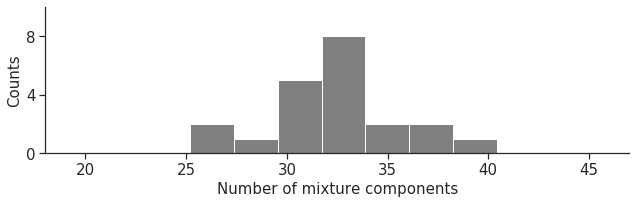

In [12]:
yy = n_component_list
fontsize = 15
plt.figure(figsize=(9,3))
plt.hist(yy,bins=np.arange(16,50,FD_binwidth)+0.5,color='gray')
ax = plt.gca()
ax.set_xlabel('Number of mixture components',fontsize=fontsize)
ax.set_ylabel('Counts',fontsize=15)

ax.set_yticks(np.arange(0,21.5,4))
ax.set_yticklabels(np.arange(0,21.5,4).astype(int),fontsize=fontsize)
ax.set_xticks(np.arange(20,51,5))
ax.set_xticklabels(ax.get_xticks(),fontsize=fontsize)
ax.set_ylim(0,10)
ax.set_xlim(18,47)
plt.tight_layout()
sns.despine()
#plt.savefig(figure_path+'gmm_aT_1_0_aE_1_0_cs_1_0_ad_1_us_bic_hist.png',dpi=300)
plt.savefig(figure_path+'Fig_3a.pdf')
plt.show()

In [18]:
[ print(y) for y in yy]


33
37
30
32
31
32
32
39
35
33
27
32
32
27
30
38
35
30
31
32
28


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [15]:
np.mean(yy)

32.19047619047619

In [8]:
from scipy.stats import iqr
iqr_val = iqr(yy, axis=None, rng=[25, 75], scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)
median_val = np.median(yy)
print(f'Number of clusters: median {np.median(yy)}, IQR: {iqr_val}')
print(f'Number of clusters: mean {np.mean(yy):0.2f}, std: {np.std(yy):0.2f}')

Number of clusters: median 32.0, IQR: 3.0
Number of clusters: mean 32.19, std: 3.16


### Consensus cluster analysis

In [1]:
# load fitted gmm model from file
import pickle
import numpy as np
import pandas as pd
import scipy.io as sio
from sklearn import mixture
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pathlib import Path
from copy import deepcopy
from scipy.optimize import linear_sum_assignment
from refactor.utils.tree_helpers import get_merged_ordered_classes
from refactor.utils.plots import matrix_scatterplot
from refactor.utils.compute import contingency, contingency_metric
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
%matplotlib inline

In [2]:
base_path = '/home/rohan/Remote-AI/'
representation_pth = base_path + 'dat/result/TE_NM_cc/'
gmm_pth            = base_path + 'dat/result/TE_NM_cc/gmm_model_select_cv_0/'
origdata_pth       = base_path + 'dat/raw/patchseq-v4/PS_v5_beta_0-4_pc_scaled_ipxf_eqTE.mat'
figure_pth        = '/home/rohan/Dropbox/AllenInstitute/CellTypes/doc/Patchseq_NM_2020/'

#Get t-types in order as per reference taxonomy:
O = sio.loadmat(origdata_pth,squeeze_me=True)
n_required_classes = np.unique(O['cluster']).size
t_type_labels,t_types = get_merged_ordered_classes(data_labels=O['cluster'].copy(),
                                                   htree_file='./refactor/data/proc/dend_RData_Tree_20181220.csv',
                                                   n_required_classes=n_required_classes)

#well-sampled t-types:
min_sample_thr=10
t_types_well_sampled = []
for t in t_types:
    if np.sum(O['cluster']==t)>min_sample_thr:
        t_types_well_sampled.append(t)

#Representations
alpha_T=1.0
alpha_E=1.0
lambda_TE=1.0
aug = 1
fiton='zT'
cv = 0
ri_list = np.arange(0,21,1)

Performed 0 merges. Remaining classes in data = 59


In [3]:
#Load dataset with same test set, trained with different initializations:
XT_orig = O['T_dat']
XE_orig = np.concatenate([O['E_pc_scaled'],O['E_feature']],axis = 1)
mask_E = np.ones_like(XE_orig)
mask_E[np.isnan(XE_orig)]=0.0
XE_orig[np.isnan(XE_orig)]=0.0

CVdict={}
key_list = ['XrE','XrT','zE','zT','train_ind','val_ind','test_ind']


for ri in tqdm(ri_list):
    cvfold_fname=(f'NM_Edat_pcipfx_aT_{alpha_T:0.1f}_aE_{alpha_E:0.1f}_cs_{lambda_TE:0.1f}'+\
                  f'_ad_{aug:d}_ld_3_bs_200_se_500_ne_1500_cv_{cv:d}_ri_{ri}_500_ft-summary').replace('.','-') + '.mat'
    
    if Path(representation_pth+cvfold_fname).is_file(): 
        X = sio.loadmat(representation_pth+cvfold_fname,squeeze_me=True)
        CVdict[ri] = {key:X[key] for key in key_list}
        CVdict[ri]['Emse'] = np.sum(mask_E*(X['XrE']-XE_orig)**2,axis=1)/np.sum(mask_E,axis=1)
        CVdict[ri]['Tmse'] = np.mean((X['XrT']-XT_orig)**2,axis=1)
        del X
    else: print(cvfold_fname,'not found')

100%|██████████| 21/21 [00:05<00:00,  4.19it/s]


#### Get cluster labels based on GMM fit applied to coupled zT and zE 

In [4]:
ref_path = '/home/rohan/Remote-AI/dat/result/TE_NM_cc/'
temp = sio.loadmat('/home/rohan/Dropbox/AllenInstitute/CellTypes/dat/raw/patchseq-v4/33_class_well_sampled_tasic.mat',squeeze_me=True)
gt_labels = temp['gt_labels']
ref_tax_33_order = [t.rstrip().lstrip() for t in temp['ref_tax_33_order']]
reference_fold = sio.loadmat(ref_path+'NM_Edat_pcipfx_aT_1-0_aE_1-0_cs_1-0_ad_1_ld_3_bs_200_se_500_ne_1500_cv_0_ri_0_500_ft-summary.mat',squeeze_me=True)
ind_dict = {'train':reference_fold['train_ind'],'test':reference_fold['test_ind']}
ind_dict['train'] = ind_dict['train'][np.isin(ind_dict['train'],temp['keep_ind'])]
ind_dict['test'] = ind_dict['test'][np.isin(ind_dict['test'],temp['keep_ind'])]

In [5]:
best_n_components = 33
for ri in CVdict.keys():
    fname = (f'gmmfit_restricted_perc_100-0_aT_{alpha_T:.1f}_aE_{alpha_E:.1f}_cs_{lambda_TE:.1f}_'+
            f'ad_1_cv_0_ri_{ri:d}_ld_3_ne_1500_fiton_zT_n_{best_n_components:d}').replace('.','-')+'.pkl'
    with open(gmm_pth+fname, 'rb') as fid:
        gmm = pickle.load(fid)

    #Label predictions using GMM fits:
    CVdict[ri]['ccT_lbl'] = gmm.predict(CVdict[ri]['zT'])
    CVdict[ri]['ccE_lbl'] = gmm.predict(CVdict[ri]['zE'])
    

    #Label prediction based on QDA:
    qda = QDA(reg_param=1e-2,store_covariance=True)
    train_ind = ind_dict['train']
    test_ind = ind_dict['test']
    all_ind = np.concatenate([ind_dict['train'],ind_dict['test']])

    qda.fit(CVdict[cv]['zE'][train_ind],gt_labels[train_ind])
    lbl_pred_E = qda.predict(CVdict[cv]['zE'])

    qda.fit(CVdict[cv]['zT'][train_ind],gt_labels[train_ind])
    lbl_pred_T = qda.predict(CVdict[cv]['zT'])

    CVdict[ri]['Tasic_E_lbl_all'] = lbl_pred_E[all_ind]
    CVdict[ri]['Tasic_T_lbl_all'] = lbl_pred_T[all_ind]

    CVdict[ri]['Tasic_E_lbl_test'] = lbl_pred_E[test_ind] 
    CVdict[ri]['Tasic_T_lbl_test'] = lbl_pred_T[test_ind] 
    
    
    CVdict[ri]['Tasic_C_all'] = contingency(CVdict[ri]['Tasic_E_lbl_all'],
                                            CVdict[ri]['Tasic_T_lbl_all'],
                                            ref_tax_33_order,
                                            ref_tax_33_order)
            
    CVdict[ri]['Tasic_C_test'] = contingency(CVdict[ri]['Tasic_E_lbl_test'],
                                             CVdict[ri]['Tasic_T_lbl_test'],
                                             ref_tax_33_order,
                                             ref_tax_33_order)
    

#### Order labels based on training data contingency matrix

In [6]:
#For each clustering, find the best ordering w.r.t. t-type labels:
for cv in CVdict.keys():
    C = contingency(a=t_type_labels.copy()[CVdict[cv]['train_ind']],
                    b=CVdict[cv]['ccT_lbl'][CVdict[cv]['train_ind']],
                    unique_a=t_types,
                    unique_b=np.arange(best_n_components))
    
    #Hungarian algorithm assignments:
    row_ind,col_ind = linear_sum_assignment(-C)
    C_ordered = C[:,col_ind]
    order_y = np.arange(0,best_n_components)[col_ind]

    CVdict[cv]['ccT_lbl_matched'] = CVdict[cv]['ccT_lbl'].copy()
    CVdict[cv]['ccE_lbl_matched'] = CVdict[cv]['ccE_lbl'].copy()

    for i in range(best_n_components):
        ind = CVdict[cv]['ccT_lbl'] == order_y[i]
        CVdict[cv]['ccT_lbl_matched'][ind] = i

        ind = CVdict[cv]['ccE_lbl'] == order_y[i]
        CVdict[cv]['ccE_lbl_matched'][ind] = i

#### Contingency matrix calculation
 - Best cplAE model is chosen based on total reconstruction error of _inlier_ test cellss
 - set `inds` to report results over the subset
 - Previously, only results for inlier test cells were being reported. 
 - Compared to earlier bioarxiv version, the contingency matrix will now include ~100 additional test cells
 - These 100 cells were previously rejected as _outliers_ (> 95%-ile on both T and E mse) 

In [27]:
from sklearn.metrics import adjusted_rand_score ,adjusted_mutual_info_score

train_sum_mse = []
test_sum_mse = []
inlier_test_sum_mse = []
inlier_test_acc_list = []
test_acc_list = []
train_acc_list = []
inds_acc_list = []
ami_list = []
for cv in CVdict.keys():
    
    #Use this for plotting contingency matrix of different subsets
    inds = CVdict[cv]['test_ind']
    #inds = np.unique(np.concatenate([CVdict[cv]['test_ind'],CVdict[cv]['train_ind']]))
    
    test_inds = CVdict[cv]['test_ind']
    train_inds = CVdict[cv]['train_ind']
    
    #conservatively remove outliers based only on reconstruction errors:
    perc = 95
    E_inlier_ind = np.flatnonzero(CVdict[cv]['Emse']<np.percentile(CVdict[cv]['Emse'],perc))
    T_inlier_ind = np.flatnonzero(CVdict[cv]['Tmse']<np.percentile(CVdict[cv]['Tmse'],perc))
    TE_inliers = np.intersect1d(E_inlier_ind,T_inlier_ind)
    inlier_test_inds = np.intersect1d(test_inds,TE_inliers)
    inlier_inds = np.intersect1d(inds,TE_inliers) 
    #train_inds = np.intersect1d(train_inds,TE_inliers)
    #inds = np.intersect1d(test_inds,TE_inliers)

    CVdict[cv]['cc_inds'] = deepcopy(inds)
                                                             
    CVdict[cv]['C_t_type'] = contingency(a=t_type_labels[inds],
                                         b=CVdict[cv]['ccT_lbl_matched'][inds],
                                         unique_a=t_types_well_sampled,
                                         unique_b=np.arange(best_n_components))

    CVdict[cv]['C_contingency'] = contingency(a=CVdict[cv]['ccE_lbl_matched'][inds],
                                              b=CVdict[cv]['ccT_lbl_matched'][inds],
                                              unique_a=np.arange(best_n_components),
                                              unique_b=np.arange(best_n_components))
    
    ari = adjusted_rand_score(CVdict[cv]['ccT_lbl_matched'][inds],CVdict[cv]['ccE_lbl_matched'][inds])
    ami = adjusted_mutual_info_score(CVdict[cv]['ccT_lbl_matched'][inds],CVdict[cv]['ccE_lbl_matched'][inds])
    

    inds_acc = np.sum(CVdict[cv]['ccT_lbl_matched'][inds]==CVdict[cv]['ccE_lbl_matched'][inds])/np.size(CVdict[cv]['ccE_lbl_matched'][inds])
    train_acc = np.sum(CVdict[cv]['ccT_lbl_matched'][train_inds]==CVdict[cv]['ccE_lbl_matched'][train_inds])/np.size(CVdict[cv]['ccE_lbl_matched'][train_inds])    
    test_acc = np.sum(CVdict[cv]['ccT_lbl_matched'][test_inds]==CVdict[cv]['ccE_lbl_matched'][test_inds])/np.size(CVdict[cv]['ccE_lbl_matched'][test_inds])
    inlier_test_acc = np.sum(CVdict[cv]['ccT_lbl_matched'][inlier_test_inds]==CVdict[cv]['ccE_lbl_matched'][inlier_test_inds])/np.size(CVdict[cv]['ccE_lbl_matched'][inlier_test_inds])
    
    inds_acc_list.append(inds_acc)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    inlier_test_acc_list.append(inlier_test_acc)

    train_sum_mse.append(np.mean(CVdict[cv]["Tmse"][train_inds])+np.mean(CVdict[cv]["Emse"][train_inds]))
    test_sum_mse.append(np.mean(CVdict[cv]["Tmse"][test_inds])+np.mean(CVdict[cv]["Emse"][test_inds]))
    inlier_test_sum_mse.append(np.mean(CVdict[cv]["Tmse"][inlier_test_inds])+np.mean(CVdict[cv]["Emse"][inlier_test_inds]))
    ami_list.append(ami)
    print(f'cv: {cv:2d}  '+\
          f'train recon: {train_sum_mse[-1]:.3f}  '+\
          f'test recon: {test_sum_mse[-1]:.3f}  '+\
          f'ari:{ari:0.3f}  '+\
          f'ami:{ami:0.3f}  '+\
          f'inds_acc:{inds_acc:0.2f}  '+\
          f'test_acc:{test_acc:0.2f}  '+\
          f'inlier_test_acc:{inlier_test_acc:0.2f}  '+\
          f'train_acc:{train_acc:0.2f}')

cv:  0  train recon: 2.224  test recon: 2.436  ari:0.215  ami:0.407  inds_acc:0.37  test_acc:0.37  inlier_test_acc:0.40  train_acc:0.55
cv:  1  train recon: 2.230  test recon: 2.433  ari:0.224  ami:0.411  inds_acc:0.38  test_acc:0.38  inlier_test_acc:0.41  train_acc:0.57
cv:  2  train recon: 2.219  test recon: 2.422  ari:0.198  ami:0.421  inds_acc:0.40  test_acc:0.40  inlier_test_acc:0.42  train_acc:0.55
cv:  3  train recon: 2.239  test recon: 2.485  ari:0.217  ami:0.434  inds_acc:0.39  test_acc:0.39  inlier_test_acc:0.41  train_acc:0.55
cv:  4  train recon: 2.214  test recon: 2.433  ari:0.294  ami:0.447  inds_acc:0.43  test_acc:0.43  inlier_test_acc:0.45  train_acc:0.59
cv:  5  train recon: 2.240  test recon: 2.466  ari:0.244  ami:0.422  inds_acc:0.38  test_acc:0.38  inlier_test_acc:0.39  train_acc:0.57
cv:  6  train recon: 2.228  test recon: 2.446  ari:0.318  ami:0.454  inds_acc:0.43  test_acc:0.43  inlier_test_acc:0.45  train_acc:0.57
cv:  7  train recon: 2.226  test recon: 2.431  a

In [22]:
print(f'ami {np.mean(ami_list):0.3f}  + {np.std(ami_list):0.3f}')

ami 0.569  + 0.011


#### Stability of clusters

In [23]:
#Pick 5 of the best models based on MSE. 
#Choosing the model based on MSE is unrelated to the clustering task, 
#and is a way to minimize variance associated with network training. 
n_best_models = 5
best_model_ind = np.argsort(inlier_test_sum_mse)
best_model_ind = best_model_ind[0:n_best_models]
print('Best model indices: ',best_model_ind)

Best model indices:  [11 17  1 14 10]


#### Comparison of clustering across different autoencoder initializations:

In [24]:
from sklearn.metrics import adjusted_mutual_info_score

T_ami = np.full((n_best_models,n_best_models), np.nan)
E_ami = np.full((n_best_models,n_best_models), np.nan)

for subset in ['test_ind','train_ind']:
    for i,i_cv in enumerate(best_model_ind):
        for j,j_cv in enumerate(best_model_ind):
            if i>j:
                subset_ind_i = CVdict[i_cv][subset]
                subset_ind_j = CVdict[j_cv][subset]
                assert np.array_equal(subset_ind_i,subset_ind_j),'Error'
                
                T_ami[i,j] = adjusted_mutual_info_score(CVdict[i_cv]['ccT_lbl_matched'][subset_ind_i],
                                                        CVdict[j_cv]['ccT_lbl_matched'][subset_ind_j])
                
                E_ami[i,j] = adjusted_mutual_info_score(CVdict[i_cv]['ccE_lbl_matched'][subset_ind_i],
                                                        CVdict[j_cv]['ccE_lbl_matched'][subset_ind_j])

    print(f'T {subset} ami over pairwise compared models : {np.nanmean(T_ami):0.3f} + {np.nanstd(T_ami):0.3f}')
    print(f'E {subset} ami over pairwise compared models : {np.nanmean(E_ami):0.3f} + {np.nanstd(E_ami):0.3f}')

T test_ind ami over pairwise compared models : 0.660 + 0.009
E test_ind ami over pairwise compared models : 0.485 + 0.010
T train_ind ami over pairwise compared models : 0.716 + 0.010
E train_ind ami over pairwise compared models : 0.567 + 0.010


**Consistency across the modalities, after aligning the unsupervised types with t-types**

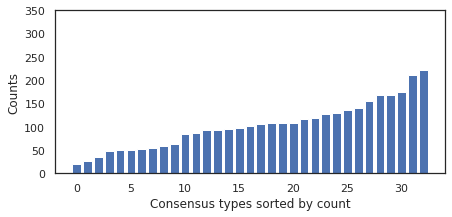

KL divergence wrt uniform distribution: 0.119


In [25]:
#Sorted count distribution across the types
(_,counts) = np.unique(CVdict[cv]['ccT_lbl_matched'],return_counts = True)
plt.figure(figsize=(7,3))
plt.bar(np.arange(counts.size),np.sort(counts))
ax = plt.gca()
ax.set_ylabel('Counts')
ax.set_xlabel('Consensus types sorted by count')
ax.set_ylim(0,350)
plt.show()

emp_P = np.sort(counts)/np.sum(counts)
uni_P = np.array([1/counts.size]*counts.size)
kl = np.sum(emp_P*np.log(emp_P/uni_P))
print(f'KL divergence wrt uniform distribution: {kl:0.3f}')
#fname='/home/rohan/Dropbox/AllenInstitute/CellTypes/doc/Patchseq_NM_2020/consensus_label_counts.mat'
#sio.savemat(fname,{'consensus_label_counts':counts})

Total samples: 683
reliable cluster frac: 0.576


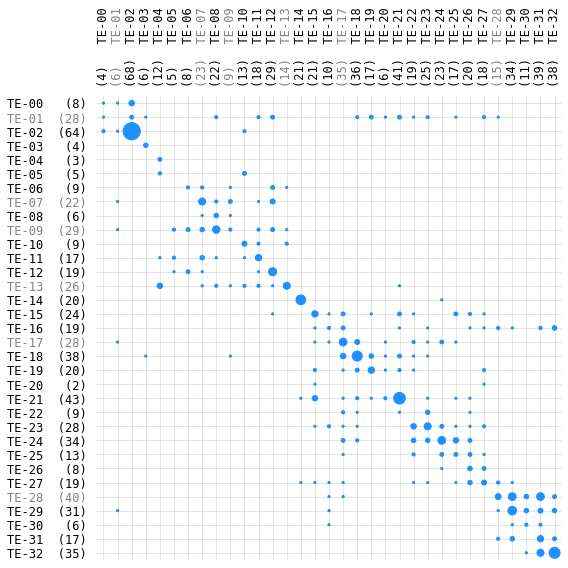

In [29]:
subset = 'test' #set this based on 'inds'
from refactor.utils.compute import contingency_metric


for cv in [best_model_ind[0]]:
    xname = [f'TE-{y:02d}' for y in np.arange(best_n_components)]
    xdata = [f'({np.sum(CVdict[cv]["ccT_lbl_matched"][CVdict[cv]["cc_inds"]]==n):d})' for n in np.arange(best_n_components)]
    xlabelc = [f'{b:<6s}'+ f'{a:s}' for (a,b) in zip(xname,xdata)]
    
    yname = [f'TE-{y:02d}' for y in np.arange(best_n_components)]
    ydata = [f'({np.sum(CVdict[cv]["ccE_lbl_matched"][CVdict[cv]["cc_inds"]]==n):d})' for n in np.arange(best_n_components)]
    ylabelc = [f'{a:6s}'+f'{b:>5s}' for (a,b) in zip(yname,ydata)]
    
    ax = matrix_scatterplot(M = CVdict[cv]['C_contingency'],
                       xticklabels = xlabelc, 
                       yticklabels = ylabelc, 
                       xlabel='',
                       ylabel='', 
                       fig_width=8, 
                       fig_height=8, 
                       scale_factor=5.0)
    
    strong_row_frac, strong_col_frac, strong_diag_frac, bad_diag, _, _ = contingency_metric(CVdict[cv]['C_contingency'].copy(),verbose = True)
    bad_diag = [1, 13, 9, 28, 7, 17] #From silhouette analysis for this fold
    cols =  ['gray' if np.isin(i,bad_diag) else 'black' for i in range(CVdict[cv]['C_contingency'].shape[0])]
    [t.set_color(i) for (i,t) in zip(cols,ax.xaxis.get_ticklabels())]
    [t.set_color(i) for (i,t) in zip(list(reversed(cols)),ax.yaxis.get_ticklabels())]
    
    plt.savefig(f'{figure_pth}TE_{subset}_cv_{cv:d}_zT_n_{best_n_components:d}.pdf')
    plt.show()

In [17]:
np.savetxt(figure_pth+'Fig_3b_source.csv', CVdict[cv]['C_contingency'], fmt='%d', delimiter=',', newline='\n', header='', footer='', comments='# ', encoding=None)

Lamp5 Fam19a1 Tmem182 14.0
Sncg Vip Itih5 83.0
Vip Lmo1 Myl1 76.0
Vip Igfbp4 Mab21l1 22.0
Sst Mme Fam114a1 39.0
Sst Calb2 Necab1 42.0
Pvalb Calb1 Sst 21.0
Pvalb Reln Tac1 33.0


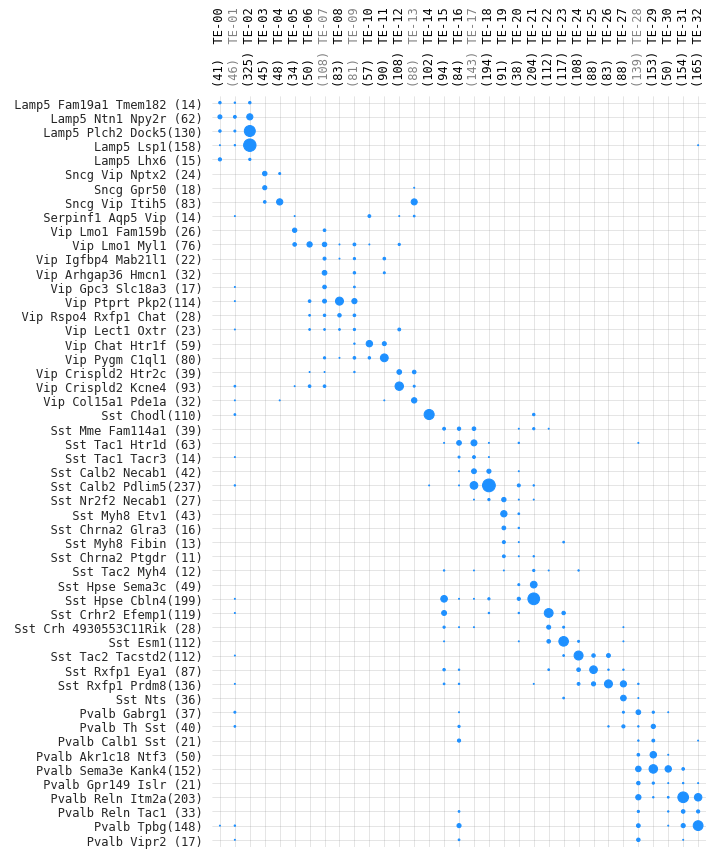

In [19]:
for cv in [best_model_ind[0]]:
    
    #Assign confidence to t_types:
    confidence = np.ones((len(t_types_well_sampled),))
    for i in np.arange(CVdict[cv]['C_t_type'].shape[0]):
        ordered = np.sort(CVdict[cv]['C_t_type'][i,:])

        if (ordered[-1]/(ordered[-2]+1e-9))<1.5:
            confidence[i] = 0
            print(t_types_well_sampled[i],np.sum(CVdict[cv]['C_t_type'][i,:]))
    
    xname = [f'TE-{y:02d}' for y in np.arange(best_n_components)]
    xdata = [f'({np.sum(CVdict[cv]["ccT_lbl_matched"][CVdict[cv]["cc_inds"]]==n):d})' for n in np.arange(best_n_components)]
    xlabelc = [f'{b:<5s}'+ f'{a:>6s}' for (a,b) in zip(xname,xdata)]

    yname = [f'{t.rstrip()}' for t in t_types_well_sampled]
    ydata = [f'({np.sum(O["cluster"][CVdict[cv]["cc_inds"]]==t)})' for t in t_types_well_sampled]
    ylabelc = [f'{a:>22s}'+f'{b:>5s}' for (a,b) in zip(yname,ydata)]
    
    ax = matrix_scatterplot(M = CVdict[cv]['C_t_type'],
                       xticklabels = xlabelc, 
                       yticklabels = ylabelc, 
                       xlabel='', 
                       ylabel='', 
                       fig_width=10, 
                       fig_height=12, 
                       scale_factor=1.0)

    cols =  ['gray' if np.isin(i,bad_diag) else 'black' for i in range(CVdict[cv]['C_t_type'].shape[1])]
    [t.set_color(i) for (i,t) in zip(cols,ax.xaxis.get_ticklabels())]
    
    #confidence = confidence[::-1]
    #cols =  ['gray' if confidence[i]==0 else 'black' for i in range(CVdict[cv]['C_t_type'].shape[0])]
    #[t.set_color(i) for (i,t) in zip(cols,ax.yaxis.get_ticklabels())]

    
    plt.savefig(f'{figure_pth}TE-t-type_{subset}_cv_{cv:d}_zT_n_{best_n_components:d}.pdf')
    plt.show()

In [20]:

np.savetxt(figure_pth+'Fig_3c_source.csv', CVdict[cv]['C_t_type'], fmt='%d', delimiter=',', newline='\n', header='', footer='', comments='# ', encoding=None)

In [38]:
X = CVdict[best_model_ind[0]]['C_contingency'].copy()
_ = contingency_metric(X)

Total samples: 3411
reliable row frac: 0.97
reliable col frac: 0.848
reliable cluster frac: 0.848
n(unreliable clusters): 5
f_consistency: 0.573
f_occupancy: 1.000


In [39]:
sio.savemat('/home/rohan/Dropbox/AllenInstitute/CellTypes/dat/raw/patchseq-v4/consensus_cluster.mat',
            {'consensus_cluster':np.array([f'TE-{x:02d}' for x in CVdict[11]['ccT_lbl_matched']]),
            'consensus_cluster_id':CVdict[11]['ccT_lbl_matched']})